In [8]:
!pip install yfinance ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=f045de393128480482fc0afdf59a2637ef4edfcb9c885d1333dae55c6cf53005
  Stored in directory: /root/.cache/pip/wheels/6a/76/03/7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [2]:
# For data manipulation
import pandas as pd

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

<ipython-input-2-3171e02dc24e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Visualize futures data

In [3]:
# Download the platinum prices
futures_data = yf.download("PL=F", start="2022-01-01", end="2022-12-31")

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,1042.599976,1042.599976,1042.599976,1042.599976,1042.599976,0
2022-12-27,1042.699951,1042.699951,1042.699951,1042.699951,1042.699951,0
2022-12-28,1029.800049,1029.800049,1029.800049,1029.800049,1029.800049,3920
2022-12-29,1013.299988,1058.099976,1010.299988,1049.699951,1049.699951,3288
2022-12-30,1055.800049,1077.500000,1052.099976,1073.699951,1073.699951,361


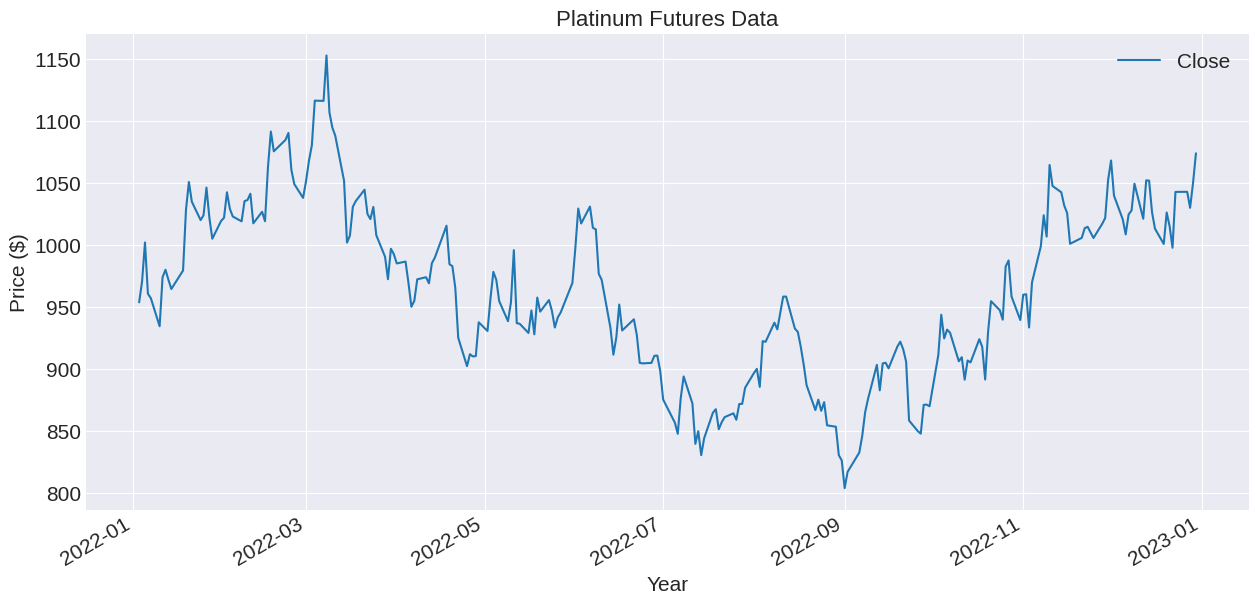

In [4]:
# Plot the close price
plt.figure(figsize=(15, 7))
futures_data['Adj Close'].plot()

# Set labels and sizes of the title and axis
plt.title('Platinum Futures Data', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

In [5]:
# Fetch gold and copper futures prices
futures_data = yf.download(["GC=F","HG=F"], start="2022-01-01", end="2022-12-31", group_by= 'tickers')

# Set the index to a datetime type
futures_data.index = pd.to_datetime(futures_data.index)

# Display the last five rows
futures_data.tail()

[*********************100%***********************]  2 of 2 completed


GC=F                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2022-12-23  1794.300049  1802.800049  1794.099976  1795.900024  1795.900024   
2022-12-27  1803.400024  1826.300049  1803.400024  1814.800049  1814.800049   
2022-12-28  1803.199951  1807.900024  1803.099976  1807.900024  1807.900024   
2022-12-29  1805.800049  1819.500000  1805.800049  1819.500000  1819.500000   
2022-12-30  1817.000000  1822.300049  1816.800049  1819.699951  1819.699951   

                     HG=F                                           
           Volume    Open    High     Low   Close Adj Close Volume  
Date                                                                
2022-12-23   49.0  3.7835  3.8110  3.7600  3.8030    3.8030    370  
2022-12-27   69.0  3.8640  3.9280  3.8335  3.8335    3.8335    380  
2022-12-28  434.0  3.8420  3.8420  3.8190  3.8320    3.8320    550  
2022-12-29  277.0  3.8310  3.8425  3.8090  3.8210    3.8210    723  
2022-12-30   95.0  3.8265  3.8315  3.8020  3.8055    3.8055    681

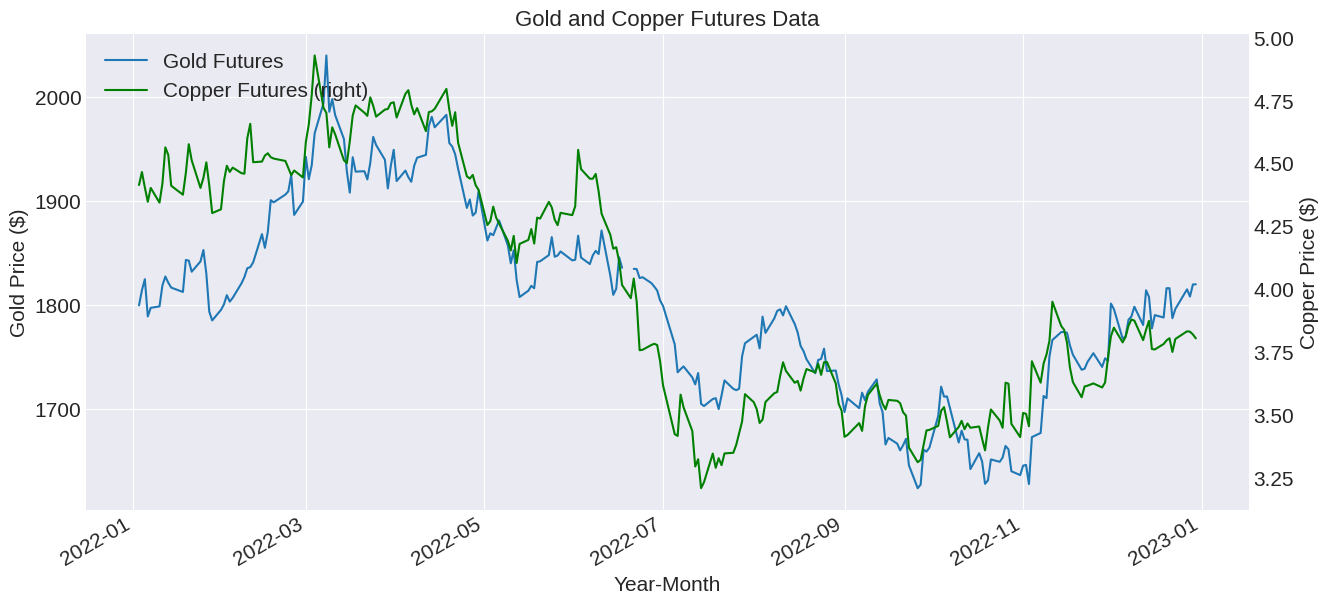

In [6]:
# Set the figure size
ax = plt.figure(figsize=(15, 7))

# Plot both futures close prices
ax = futures_data['GC=F']['Close'].plot(label='Gold Futures')
ax2 = futures_data['HG=F']['Close'].plot(secondary_y=True, color='g',  ax=ax, label='Copper Futures')

# Set the title and axis labels and sizes
plt.title('Gold and Copper Futures Data', fontsize=16)
ax.set_xlabel('Year-Month', fontsize=15)
ax.set_ylabel('Gold Price ($)', fontsize=15)
ax2.set_ylabel('Copper Price ($)', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=2, prop={'size': 15})

# Show the plot
plt.show()

# Add technical indicators

In [11]:
import ta

futures_symbol = "ES=F"
futures_data = yf.download(futures_symbol, start="2022-01-01", end="2022-04-01", interval="1d")


[*********************100%***********************]  1 of 1 completed


In [12]:
# Calculate RSI
futures_data["RSI"] = ta.momentum.RSIIndicator(futures_data["Close"]).rsi()

# Calculate Bollinger Bands
bbands = ta.volatility.BollingerBands(futures_data["Close"])
futures_data["BB_upper"] = bbands.bollinger_hband()
futures_data["BB_lower"] = bbands.bollinger_lband()

# Calculate MACD
macd = ta.trend.MACD(futures_data["Close"])
futures_data["MACD"] = macd.macd()
futures_data["MACD_signal"] = macd.macd_signal()


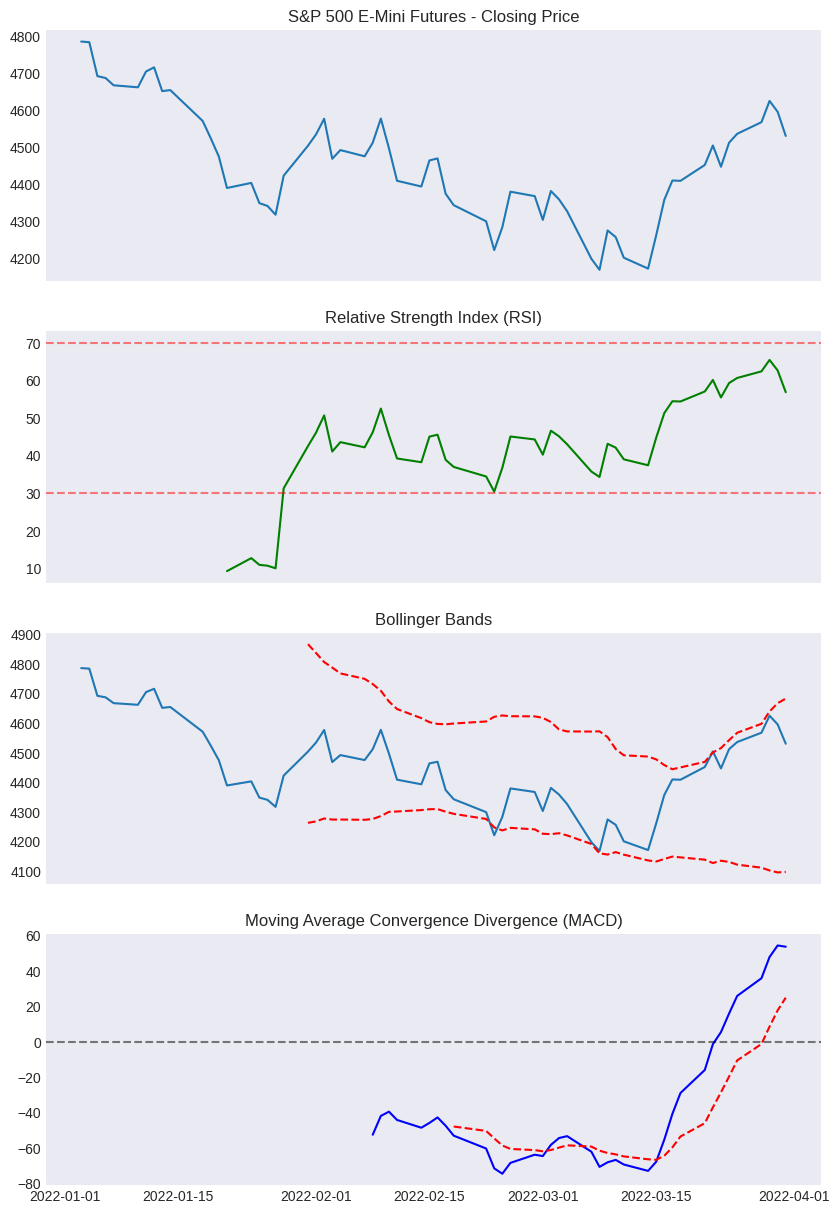

In [13]:
# Create subplots for each indicator
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot closing price
axes[0].plot(futures_data.index, futures_data["Close"], label="Close")
axes[0].set_title("S&P 500 E-Mini Futures - Closing Price")
axes[0].grid()

# Plot RSI
axes[1].plot(futures_data.index, futures_data["RSI"], label="RSI", color="g")
axes[1].axhline(30, linestyle="--", color="r", alpha=0.5)
axes[1].axhline(70, linestyle="--", color="r", alpha=0.5)
axes[1].set_title("Relative Strength Index (RSI)")
axes[1].grid()

# Plot Bollinger Bands
axes[2].plot(futures_data.index, futures_data["Close"], label="Close")
axes[2].plot(futures_data.index, futures_data["BB_upper"], label="Upper Bollinger Band", linestyle="--", color="r")
axes[2].plot(futures_data.index, futures_data["BB_lower"], label="Lower Bollinger Band", linestyle="--", color="r")
axes[2].set_title("Bollinger Bands")
axes[2].grid()

# Plot MACD
axes[3].plot(futures_data.index, futures_data["MACD"], label="MACD", color="b")
axes[3].plot(futures_data.index, futures_data["MACD_signal"], label="Signal Line", linestyle="--", color="r")
axes[3].axhline(0, linestyle="--", color="k", alpha=0.5)
axes[3].set_title("Moving Average Convergence Divergence (MACD)")
axes[3].grid()

